# Redes Neuronales

<center>
    
<img src='images/Neuron.svg' width=60%\>
</center>

[Fuente Wikipedia](https://commons.wikimedia.org/w/index.php?title=File:Neuron.svg&oldid=343028396)

Una red neuronal es una estructura compuesta por **nodos** o **unidades** que se encuentran interconectados. La potencia de la interconexión entre los nodos se evalúa por medio un valor de **peso**. Si la suma ponderada de todas las conexiones al **nodo** o **neurona** es mayor que un **valor umbral**, decimos que la neurona se **activa**. La función matemática aplicada a la suma ponderada se denomina **función de activación**. 

Se denomina **Modelo de Perceptrón** a una red neuronal con una sola salida.

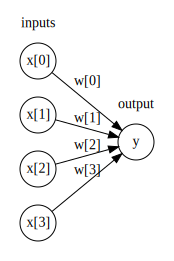

In [1]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

Sea $\mathbf{X}$ el espacio de entrada que contiene $N$ muestras de datos. Cada muestra está descrita por $d$ características o **features**. Sea $\mathcal{Y} = \{-1, +1\}$ el espacio de salida binario. El perceptrón queda definido por:


    
$h(\mathbf{x}) = sign \left( \sum_{i=1}^{d} \left( w_ix_i \right) + b \right)$

Donde **sign** es la función signo

Sea $\mathbf{w} = \{w_{0},w_{1}, w_{2}, \dots, w_{d} \}^T$ el vector de pesos; en donde $w_{0}=b$ y sea $\mathbf{x} = \{x_{0},x_{1}, x_{2}, \dots, x_{d} \}^T $ con $w_{0}=1$, entonces la expresión para el Perceptron se puede reescribir:

$h(\mathbf{x}) = sign \left(  \mathbf{w}^T \mathbf{x} \right)$

## Algoritmo de aprendizaje del perceptrón
Para realizar el entrenamiento es preciso que las muestras de datos y etiquetas (o valores) sean randomizados. Luega en cada iteración se corregirá los valores del vector $\mathbf{w}$, mediante la siguiente expresión:

$\mathbf{w}(t+1)=\mathbf{w}(t)+\alpha y(t)\mathbf{x}(t)$

## El Perceptron  y la compuerta AND
La compuerta **and** consta de 4 ejemplos. Cada uno con 2 características $d=2$. 


| muestra | x1 | x2 | y  |
|---------|----|----|----|
| 1       | -1 | -1 | -1 |
| 2       | -1 |  1 | -1 |
| 3       |  1 | -1 | -1 |
| 4       |  1 | 1  |  1 |



In [2]:
import numpy as np
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([-1, -1, -1, 1])
print('X es:\n{}'.format(X))
print('Y es:\n{}'.format(Y))

X es:
[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
Y es:
[-1 -1 -1  1]


In [3]:
from sklearn.linear_model import Perceptron
percept_and = Perceptron(verbose=1, shuffle=True)
percept_and.fit(X, Y)
print('Rendimiento del entrenamiento: {}'.format(percept_and.score(X,Y)))

-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 4, Avg. loss: 0.750000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 8, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 12, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 20, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Rendimiento del entrenamiento: 1.0


/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [4]:
y_pred = percept_and.predict(X)
y_pred

array([-1, -1, -1,  1])

## Ejercicio:
1. Verifique que la Compuerta **XOR** No tiene solución con un Perceptron
2. Verifique que la Computerta **OR** Tiene solución con un Perceptrón
3. Escriba un programa en Python que ejecute el algoritmo de aprendizaje del Perceptrón

## Redes Neuronales Multicapa con Alimentación hacia adelante (Feed Forward)
Al añadir capas ocultas a una estructra de redes neuronales se amplía el espacio de hipótesis. Una red sencilla con una capa oculta con 3 perceptrones es la indicada en la siguiente figura. Observe la estructura de izquiera a derecha formada por:

* Capa de entrada
* Capa oculta
* Capa de Salida

Note que la capa de salida puede tener más nodos.


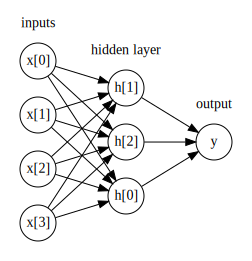

In [5]:
mglearn.plots.plot_single_hidden_layer_graph()


La complejidad del problema puede requerir incrementar el número de capas ocultas. Para entrenar este tipo de redes se necesita el algoritmo de **back propagation** o retropropagación del error, ya que al tener varias neuronas en una capa oculta se dispone de un vector de hipótesis cuyos valores correctos no se conocen previamente. 

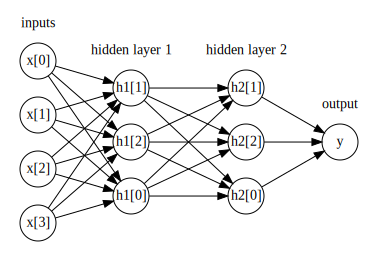

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

## Ejercicio:
Utilice una red neuronal multicapa para clasificar los datos del dataset moons, con:
* Algoritmo de descenso de gradiente estocástico,
* 50 neuronas en la capa oculta,
* Función de activación relu, luego con sigmoid
* Pruebe con algoritmo lbfgs y sgd 

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# print(X[0:5,:])
print(y)
print(len(X))

[1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0]
100


Realicemos un plot de los datos

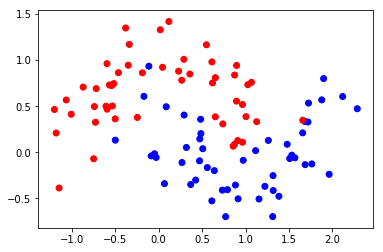

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_bright)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42) #, stratify=y
red = MLPClassifier(hidden_layer_sizes=(50,), 
                    solver='sgd', 
#                     learning_rate_init=0.0001, 
#                     activation='relu', 
                    random_state=0, 
                    verbose=True, 
                    max_iter=1000)
history = red.fit(X_train, y_train) 

print(len(X_train))
# lbfgs

Iteration 1, loss = 0.67948739
Iteration 2, loss = 0.67915809
Iteration 3, loss = 0.67868928
Iteration 4, loss = 0.67809569
Iteration 5, loss = 0.67739037
Iteration 6, loss = 0.67658609
Iteration 7, loss = 0.67569401
Iteration 8, loss = 0.67472395
Iteration 9, loss = 0.67368554
Iteration 10, loss = 0.67258706
Iteration 11, loss = 0.67143620
Iteration 12, loss = 0.67023946
Iteration 13, loss = 0.66900273
Iteration 14, loss = 0.66773188
Iteration 15, loss = 0.66643203
Iteration 16, loss = 0.66510874
Iteration 17, loss = 0.66376526
Iteration 18, loss = 0.66240714
Iteration 19, loss = 0.66103601
Iteration 20, loss = 0.65965500
Iteration 21, loss = 0.65826646
Iteration 22, loss = 0.65687314
Iteration 23, loss = 0.65548093
Iteration 24, loss = 0.65408727
Iteration 25, loss = 0.65269483
Iteration 26, loss = 0.65130382
Iteration 27, loss = 0.64991403
Iteration 28, loss = 0.64852883
Iteration 29, loss = 0.64714910
Iteration 30, loss = 0.64577370
Iteration 31, loss = 0.64440392
Iteration 32, los

Iteration 398, loss = 0.43897324
Iteration 399, loss = 0.43874337
Iteration 400, loss = 0.43851436
Iteration 401, loss = 0.43828613
Iteration 402, loss = 0.43805854
Iteration 403, loss = 0.43783175
Iteration 404, loss = 0.43760575
Iteration 405, loss = 0.43738054
Iteration 406, loss = 0.43715614
Iteration 407, loss = 0.43693252
Iteration 408, loss = 0.43670985
Iteration 409, loss = 0.43648799
Iteration 410, loss = 0.43626689
Iteration 411, loss = 0.43604655
Iteration 412, loss = 0.43582697
Iteration 413, loss = 0.43560813
Iteration 414, loss = 0.43539004
Iteration 415, loss = 0.43517269
Iteration 416, loss = 0.43495606
Iteration 417, loss = 0.43473998
Iteration 418, loss = 0.43452459
Iteration 419, loss = 0.43430988
Iteration 420, loss = 0.43409563
Iteration 421, loss = 0.43388189
Iteration 422, loss = 0.43366866
Iteration 423, loss = 0.43345609
Iteration 424, loss = 0.43324418
Iteration 425, loss = 0.43303298
Iteration 426, loss = 0.43282249
Iteration 427, loss = 0.43261266
Iteration 

In [10]:
X_test

array([[ 0.89715307,  0.94175457],
       [ 1.06821751,  0.75846569],
       [-0.4993884 ,  0.13192906],
       [-0.46333991,  0.86330772],
       [-0.7280717 ,  0.3259131 ],
       [ 1.72532644,  0.53367598],
       [ 2.11889248,  0.60498388],
       [ 1.31702684, -0.2525239 ],
       [ 1.11634545,  0.01823342],
       [ 0.55039452,  1.16554689],
       [ 0.36877983, -0.34894509],
       [ 0.42598043, -0.3006242 ],
       [-0.24608615,  0.378107  ],
       [-0.60690411,  0.50000529],
       [ 1.15536561, -0.50593577],
       [ 1.26285558,  0.12916271],
       [-0.59385445,  0.46769065],
       [ 1.12856036,  0.33191968],
       [-0.04686928, -0.01567029],
       [ 0.8729088 ,  0.08643291],
       [ 0.01856462,  1.32827802],
       [ 1.00549331,  0.38686701],
       [-0.16955317,  0.60660877],
       [ 1.50917461, -0.06701048],
       [-0.38099245,  1.34740194],
       [-0.51699811,  0.74457804],
       [ 1.31311917, -0.69665985],
       [ 0.77145295, -0.69709227],
       [ 0.97370054,

La precisión sobre el dataset de entrenamiento es:

In [11]:
acc = red.score(X_train, y_train)
acc

0.8285714285714286

La precisión sobre el dataset de prueba es:

In [12]:
acc_test = red.score(X_test, y_test)
acc_test

0.8

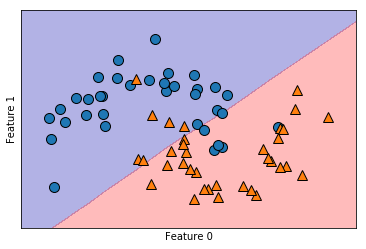

In [13]:
import mglearn
mglearn.plots.plot_2d_separator(red, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show()

## Ejercicio
Resuelva el problema del XOR con 2 neuronas en la capa oculta. Considere utilizar una función de activación apropiada

In [14]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([[-1], [1], [1],[-1] ])

Pruebe el código utilizando:
1. SGD
2. lbfgs

In [15]:
red_xor = MLPClassifier(hidden_layer_sizes=(4),
                        activation='tanh',
                        solver='lbfgs',
                        max_iter=1500, verbose=1)
#lbfgs / lbfgs

Entrenando la red:

In [16]:
red_xor.fit(X, Y) 

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [17]:
red_xor.score(X, Y)

0.75

In [18]:
y_pred = red_xor.predict(X)
y_pred

array([-1,  1, -1, -1])

In [19]:
y_grafico = [-1, 1, 1, -1]  

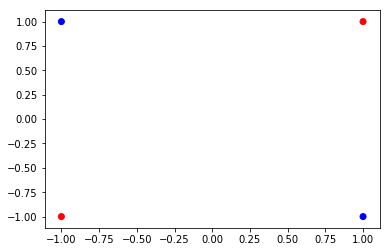

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y_grafico, cmap=cm_bright)
plt.show()

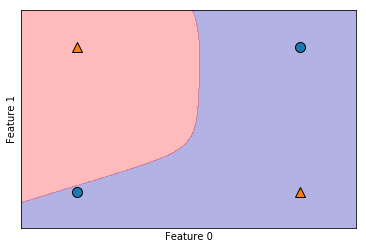

In [21]:
import mglearn 
mglearn.plots.plot_2d_separator(red_xor, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_grafico) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show()

## Ejercicios adicionales
Resuelva con una arquitectura de red neuronal feed forward multicapa el dataset iris

## Red Neuronal como Regresión
Considere una función $y = x^2-2x+3$. Para el intervalo de $[-5, 5]$ Obtenga 1000 puntos. Puede hacer que la red neuronal reproduzca esta función en el Intervalo propuesto?

Que pasa si incrementa el dataset a 2000 muestras?

In [56]:
import numpy as np
x = np.linspace(-5,5, num=1000)
# x = np.arange(10)
y = x*x-2*x+3
# y
# print(np.shape(x))

In [23]:
x

array([-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,
        5.       ])

In [57]:
x = x.reshape(-1,1)
print(np.shape(x))

(1000, 1)


In [25]:
y = y.reshape(-1,1)

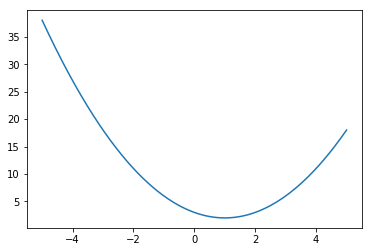

In [58]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,y)
plt.show()

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
red_funcion = MLPRegressor(hidden_layer_sizes=(500,), solver='adam', activation='relu', verbose=1)
red_funcion.fit(x_train, y_train)

Iteration 1, loss = 106.77519863
Iteration 2, loss = 101.93573500
Iteration 3, loss = 97.44138476
Iteration 4, loss = 92.98556410
Iteration 5, loss = 88.63445613
Iteration 6, loss = 84.44067036
Iteration 7, loss = 80.19360377
Iteration 8, loss = 76.05414774
Iteration 9, loss = 71.73785185
Iteration 10, loss = 67.65048655
Iteration 11, loss = 63.33436047
Iteration 12, loss = 59.05521976
Iteration 13, loss = 55.00526684
Iteration 14, loss = 50.80099902
Iteration 15, loss = 46.71776236
Iteration 16, loss = 42.60699043
Iteration 17, loss = 38.70842585
Iteration 18, loss = 35.06207394
Iteration 19, loss = 31.41041555
Iteration 20, loss = 27.91934341
Iteration 21, loss = 24.65760502
Iteration 22, loss = 21.77795013
Iteration 23, loss = 18.95282583
Iteration 24, loss = 16.48684057
Iteration 25, loss = 14.20326601
Iteration 26, loss = 12.21606205
Iteration 27, loss = 10.42945430
Iteration 28, loss = 8.99334634
Iteration 29, loss = 7.67258941
Iteration 30, loss = 6.62159264
Iteration 31, loss =

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [60]:
red_funcion.score(x_test,y_test)

0.9785230656126481

In [61]:
x_test = np.linspace(-10,10,500)
y_real = x_test*x_test-2*x_test+3
x_test = x_test.reshape(-1,1)
# x_test
y_pred = red_funcion.predict(x_test)

# y_pred

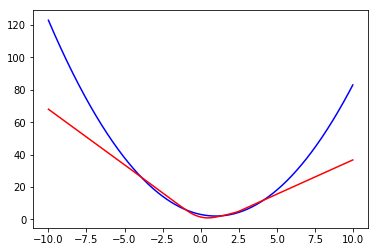

In [62]:
plt.figure()
plt.plot(x_test, y_real, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.show()

¿Qué sucede si deseo calcular para un valor fuera del rango como por ejemplo $x=5.5$?

In [65]:
x_num = 15.5
y_num = x_num*x_num-2*x_num+3
y_num

212.25

In [66]:
x_num = np.asarray(x_num)
x_num = x_num.reshape(-1,1)
y_num_pred = red_funcion.predict(x_num)
y_num_pred

array([59.94639315])

## Resolviendo el problema de clasificación del iris dataset
Considere el problema de clasificar las flores iris según la longitud y ancho del sépalo y el pétolo. Resuelva este problema utilizando Redes Neuronales Multicapa

In [33]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Los primeros 5 datos del dataset son $\mathbf{\mathcal{X}}:$

In [34]:
iris_dataset['data'][0:5,:]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Las etiquetas para las **muestras** o **samples** anteriores son:

In [35]:
iris_dataset['target'][0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Paso los datos del iris dataset a una variable $\mathbf{\mathcal{X}}$

In [36]:
X = iris_dataset['data']
Y = iris_dataset['target']

Codificando las clases como **ONE HOT**

In [37]:
from keras.utils import np_utils
Y_one_hot = np_utils.to_categorical(Y)
Y_one_hot

Using TensorFlow backend.


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Escalando los valores de $\mathbf{\mathcal{X}}$. Sin embargo primero pruebe el entrenamiento sin escalar los datos.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
funcion_escalado = scaler.fit(X)
# X_escalado = X
X_escalado = funcion_escalado.transform(X)
print('La media {}'.format(scaler.mean_))
print('Escalado de X, se muestra primeras 5 filas \n{}'.format(X_escalado[0:5,:]))
print('min {}'.format(X_escalado.min()))
print('max {}'.format(X_escalado.max()))
# StandardScaler?

La media [5.84333333 3.05733333 3.758      1.19933333]
Escalado de X, se muestra primeras 5 filas 
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
min -2.43394714190809
max 3.0907752482994253


Dividiendo el dataset en train y test. Los datos se deben aleatorizar

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_escalado, Y_one_hot, test_size=0.2, random_state=73)
X_train[0:5,:]

array([[ 0.31099753, -0.36217625,  0.53540856,  0.26414192],
       [-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [ 0.31099753, -0.13197948,  0.64908342,  0.79067065]])

In [40]:
Y_train[0:5]


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

Creando un Modelo de Redes Neuronales Artificiales

In [41]:
from sklearn.neural_network import MLPClassifier
red_iris = MLPClassifier(hidden_layer_sizes=(3,),
                        activation='tanh',
                        solver='sgd',
                        momentum=0.95,
                        max_iter=1500, verbose=1)


Ajuste de Modelo

In [42]:
red_iris.fit(X_train, Y_train)

Iteration 1, loss = 2.62087364
Iteration 2, loss = 2.61809427
Iteration 3, loss = 2.61403511
Iteration 4, loss = 2.60876721
Iteration 5, loss = 2.60235984
Iteration 6, loss = 2.59488046
Iteration 7, loss = 2.58639464
Iteration 8, loss = 2.57696608
Iteration 9, loss = 2.56665658
Iteration 10, loss = 2.55552605
Iteration 11, loss = 2.54363257
Iteration 12, loss = 2.53103237
Iteration 13, loss = 2.51777991
Iteration 14, loss = 2.50392794
Iteration 15, loss = 2.48952753
Iteration 16, loss = 2.47462821
Iteration 17, loss = 2.45927800
Iteration 18, loss = 2.44352357
Iteration 19, loss = 2.42741030
Iteration 20, loss = 2.41098241
Iteration 21, loss = 2.39428309
Iteration 22, loss = 2.37735456
Iteration 23, loss = 2.36023823
Iteration 24, loss = 2.34297470
Iteration 25, loss = 2.32560389
Iteration 26, loss = 2.30816500
Iteration 27, loss = 2.29069653
Iteration 28, loss = 2.27323622
Iteration 29, loss = 2.25582092
Iteration 30, loss = 2.23848653
Iteration 31, loss = 2.22126775
Iteration 32, los

Iteration 395, loss = 0.92680940
Iteration 396, loss = 0.92573280
Iteration 397, loss = 0.92465922
Iteration 398, loss = 0.92358864
Iteration 399, loss = 0.92252102
Iteration 400, loss = 0.92145633
Iteration 401, loss = 0.92039456
Iteration 402, loss = 0.91933566
Iteration 403, loss = 0.91827961
Iteration 404, loss = 0.91722640
Iteration 405, loss = 0.91617597
Iteration 406, loss = 0.91512833
Iteration 407, loss = 0.91408342
Iteration 408, loss = 0.91304124
Iteration 409, loss = 0.91200175
Iteration 410, loss = 0.91096493
Iteration 411, loss = 0.90993076
Iteration 412, loss = 0.90889921
Iteration 413, loss = 0.90787025
Iteration 414, loss = 0.90684387
Iteration 415, loss = 0.90582004
Iteration 416, loss = 0.90479873
Iteration 417, loss = 0.90377993
Iteration 418, loss = 0.90276361
Iteration 419, loss = 0.90174975
Iteration 420, loss = 0.90073833
Iteration 421, loss = 0.89972932
Iteration 422, loss = 0.89872271
Iteration 423, loss = 0.89771847
Iteration 424, loss = 0.89671659
Iteration 

Iteration 775, loss = 0.62552109
Iteration 776, loss = 0.62490395
Iteration 777, loss = 0.62428756
Iteration 778, loss = 0.62367192
Iteration 779, loss = 0.62305702
Iteration 780, loss = 0.62244286
Iteration 781, loss = 0.62182945
Iteration 782, loss = 0.62121678
Iteration 783, loss = 0.62060486
Iteration 784, loss = 0.61999368
Iteration 785, loss = 0.61938324
Iteration 786, loss = 0.61877355
Iteration 787, loss = 0.61816460
Iteration 788, loss = 0.61755639
Iteration 789, loss = 0.61694893
Iteration 790, loss = 0.61634220
Iteration 791, loss = 0.61573622
Iteration 792, loss = 0.61513098
Iteration 793, loss = 0.61452648
Iteration 794, loss = 0.61392272
Iteration 795, loss = 0.61331970
Iteration 796, loss = 0.61271743
Iteration 797, loss = 0.61211589
Iteration 798, loss = 0.61151509
Iteration 799, loss = 0.61091503
Iteration 800, loss = 0.61031571
Iteration 801, loss = 0.60971714
Iteration 802, loss = 0.60911930
Iteration 803, loss = 0.60852219
Iteration 804, loss = 0.60792583
Iteration 

Iteration 1226, loss = 0.41665173
Iteration 1227, loss = 0.41632320
Iteration 1228, loss = 0.41599517
Iteration 1229, loss = 0.41566762
Iteration 1230, loss = 0.41534056
Iteration 1231, loss = 0.41501398
Iteration 1232, loss = 0.41468788
Iteration 1233, loss = 0.41436227
Iteration 1234, loss = 0.41403715
Iteration 1235, loss = 0.41371250
Iteration 1236, loss = 0.41338834
Iteration 1237, loss = 0.41306465
Iteration 1238, loss = 0.41274145
Iteration 1239, loss = 0.41241872
Iteration 1240, loss = 0.41209648
Iteration 1241, loss = 0.41177471
Iteration 1242, loss = 0.41145341
Iteration 1243, loss = 0.41113260
Iteration 1244, loss = 0.41081226
Iteration 1245, loss = 0.41049239
Iteration 1246, loss = 0.41017300
Iteration 1247, loss = 0.40985408
Iteration 1248, loss = 0.40953563
Iteration 1249, loss = 0.40921766
Iteration 1250, loss = 0.40890015
Iteration 1251, loss = 0.40858312
Iteration 1252, loss = 0.40826655
Iteration 1253, loss = 0.40795046
Iteration 1254, loss = 0.40763483
Iteration 1255

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.95,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

Evaluando el desempeño de entrenamiento de la Red Iris

In [43]:
red_iris.score(X_train, Y_train)

0.9666666666666667

Evaluando el desempeño de la Red Iris en el dataset de Prueba

In [44]:
red_iris.score(X_test, Y_test)

0.9

Dibujando la función de pérdida

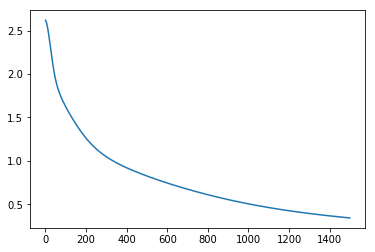

In [45]:
import matplotlib.pyplot as plt
cost_function = red_iris.loss_curve_
plt.figure()
plt.plot(cost_function)
plt.show() 